In [14]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from lane import Lane

In [15]:
l = Lane()

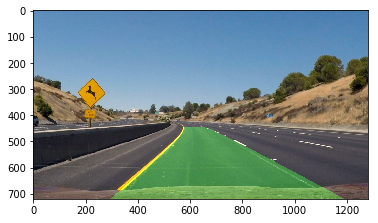

In [16]:
image = mpimg.imread('test_images/test2.jpg')
l.detect(image)
overlay = l.image_overlay(image.shape)
result = cv2.addWeighted(image, 1, overlay, 0.3, 0)
plt.imshow(result)

In [8]:
l.left.fits

[array([ -4.90021456e-05,  -1.04275800e-01,   4.50157540e+02]),
 array([  1.81606749e-04,  -2.05253622e-01,   4.10786824e+02])]

In [9]:
l.right.fits

[array([  4.78821419e-04,  -7.47034822e-01,   1.26333369e+03]),
 array([  4.31925455e-04,  -3.17677980e-01,   1.06004847e+03])]

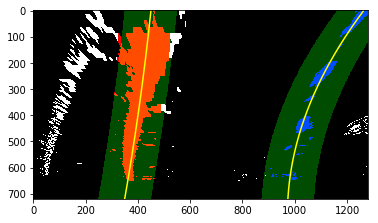

In [6]:
warped, left_fitx, right_fitx, ploty = l.warped_image(image)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.imshow(warped)

In [3]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [4]:
def process_image(image, lane):
    lane.detect(image)
    overlay = lane.image_overlay(image.shape)
    return cv2.addWeighted(image, 1, overlay, 0.3, 0)

In [5]:
l = Lane()
video_output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
processed_clip = clip1.fl_image(lambda img: process_image(img, l)) #NOTE: this function expects color images!!
%time processed_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [04:12<00:00,  5.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 5min 18s, sys: 51.7 s, total: 6min 9s
Wall time: 4min 12s


HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))


In [6]:
la = Lane()

In [7]:
vidcap = cv2.VideoCapture("challenge_video.mp4")
vidcap.set(cv2.CAP_PROP_POS_MSEC,1000)      # just cue to 20 sec. position
success,image = vidcap.read()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
la.detect(image)

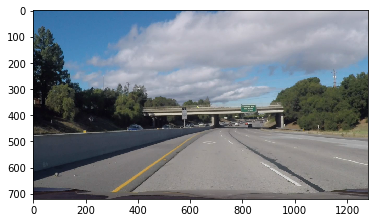

In [8]:
plt.imshow(image)

In [6]:
#plt.imsave('test_images/diff1.jpg', image)
image = mpimg.imread('test_images/diff1.jpg')

In [7]:
la.detect(image)

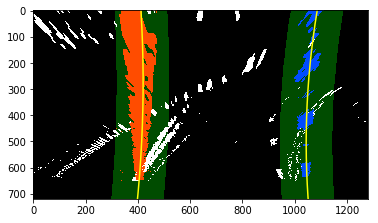

In [9]:
warped, left_fitx, right_fitx, ploty = l.warped_image(image)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.imshow(warped)

In [28]:
la.left.fits

[array([ -1.74769766e-04,   1.81616716e-01,   3.07357622e+02])]

In [29]:
la.right.fits

[array([  3.11745092e-04,  -2.03885636e-01,   1.03361593e+03])]

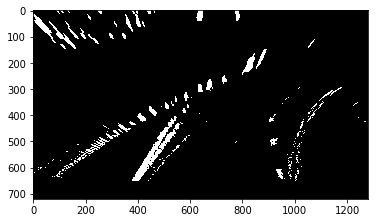

In [13]:
plt.imshow(Lane.process_image(image), cmap='gray')

In [10]:
from camera import undistort
import thresholds
import perspective

In [11]:
def process_image(image):
    image = np.copy(image)
    image = undistort(image)
    image = thresholds.default(image)
    return image

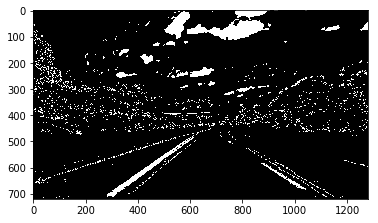

In [12]:
plt.imshow(process_image(image), cmap='gray')